In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['MAN', 'NDG']
di_sugar2= ['DManpa', 'DGlcpNAca']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 27 
valid torsion1 and torsion2: (27, 27)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['3.F', '2.F'], ['4C1', '4C1'])
(['3.W', '2.W'], ['4C1', '4C1'])
(['3.L', '2.L'], ['4C1', '4C1'])
(['3.R', '2.R'], ['4C1', '4C1'])
(['3.I', '2.I'], ['4C1', 'O3B'])
(['3.C', '2.C'], ['-', '1S3'])
(['3.U', '2.U'], ['4C1', '-'])
(['3.K', '2.K'], ['4C1', '-'])
(['3.P', '2.P'], ['4C1', '-'])
(['3.C', '2.C'], ['-', '1S3'])
(['3.B', '2.B'], ['O3B', '1S3'])
(['3.F', '2.F'], ['B14', '1S3'])
(['3.C', '2.C'], ['-', '1S3'])
(['3.I', '2.I'], ['OS2', '1C4'])
(['3.D', '2.D'], ['OS2', '14B'])
(['3.L', '2.L'], ['OS2', '1C4'])
(['3.O', '2.O'], ['OS2', '1S3'])
(['3.P', '2.P'], ['4C1', 'BO3'])
(['3.F', '2.F'], ['4C1', '-'])
(['3.F', '2.F'], ['4C1', '-'])
(['3.C', '2.C'], ['-', '14B'])
(['3.F', '2.F'], ['4C1', '-'])
(['3.E', '2.E'], ['-', '-'])
(['3.F', '2.F'], ['4C1', '-'])
(['3.G', '2.G'], ['4C1', 'BO3'])
(['3.D', '2.D'], ['1C4', '1C4'])
(['3.C', '2.C'], ['-', '-'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//1xfd.pdb F MAN 3 C1
../../pdbs//1xfd.pdb F NDG 2 O4
23420 23416
Connection found between(2) 23420 and 23416
../../pdbs//1xfd.pdb W MAN 3 C1
../../pdbs//1xfd.pdb W NDG 2 O4
24039 24035
Connection found between(2) 24039 and 24035
../../pdbs//1xfd.pdb L MAN 3 C1
../../pdbs//1xfd.pdb L NDG 2 O4
23665 23661
Connection found between(2) 23665 and 23661
../../pdbs//1xfd.pdb R MAN 3 C1
../../pdbs//1xfd.pdb R NDG 2 O4
23866 23862
Connection found between(2) 23866 and 23862
../../pdbs//1fl7.pdb I MAN 3 C1
../../pdbs//1fl7.pdb I NDG 2 O4
3143 3139
Connection found between 3143 and 3139
../../pdbs//2doj.pdb C MAN 3 C1
../../pdbs//2doj.pdb C NDG 2 O4
2663 2659
Connection found between 2663 and 2659
../../pdbs//1flc.pdb U MAN 3 C1
../../pdbs//1flc.pdb U NDG 2 O4
14281 14277
Connection found between(2) 14281 and 14277
../../pdbs//1flc.pdb K MAN 3 C1
../../pdbs//1flc.pdb K NDG 2 O4
13891 13887
Connection found between(2) 13891 and 13887
../../pdbs//1flc.pdb P MAN 3 C1
../../pdbs//1flc.pdb P

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,1xfd.pdb,F MAN 3 C2 C1 NDG 2 O4 C4,F MAN 3 C1 NDG 2 O4 C4 C5,220.8390,160.6380,"([MAN(3_F_), NDG(2_F_)], [108.64, 95.0])",BMA(4_F_)-MAN(3_F_)-NDG(2_F_)-NAG(1_F_)-ASN(17...,DManpb1-4DManpa1-4DGlcpNAca1-4DGlcpNAca1-ASN,"([3.F, 2.F], [4C1, 4C1])"
1,1xfd.pdb,W MAN 3 C2 C1 NDG 2 O4 C4,W MAN 3 C1 NDG 2 O4 C4 C5,187.1140,167.2610,"([MAN(3_W_), NDG(2_W_)], [114.1, 108.8])",MAN(3_W_)-NDG(2_W_)-NAG(1_W_)-ASN(173_D_),DManpa1-4DGlcpNAca1-4DGlcpNAca1-ASN,"([3.W, 2.W], [4C1, 4C1])"
2,1xfd.pdb,L MAN 3 C2 C1 NDG 2 O4 C4,L MAN 3 C1 NDG 2 O4 C4 C5,185.0590,162.7870,"([MAN(3_L_), NDG(2_L_)], [132.6, 119.55])",MAN(3_L_)-NDG(2_L_)-NAG(1_L_)-ASN(173_B_),DManpa1-4DGlcpNAca1-4DGlcpNAca1-ASN,"([3.L, 2.L], [4C1, 4C1])"
3,1xfd.pdb,R MAN 3 C2 C1 NDG 2 O4 C4,R MAN 3 C1 NDG 2 O4 C4 C5,175.9980,173.2420,"([MAN(3_R_), NDG(2_R_)], [127.94, 110.98])",MAN(3_R_)-NDG(2_R_)-NAG(1_R_)-ASN(173_C_),DManpa1-4DGlcpNAca1-4DGlcpNAca1-ASN,"([3.R, 2.R], [4C1, 4C1])"
4,1fl7.pdb,I MAN 3 C2 C1 NDG 2 O4 C4,I MAN 3 C1 NDG 2 O4 C4 C5,272.5925,57.2039,"([MAN(3_I_), NDG(2_I_)], [100.0, 100.0])",MAN(3_I_)-NDG(2_I_)-NAG(1_I_)-ASN(78_C_),DManpa1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([3.I, 2.I], [4C1, O3B])"
5,2doj.pdb,C MAN 3 C2 C1 NDG 2 O4 C4,C MAN 3 C1 NDG 2 O4 C4 C5,237.1600,222.0790,"([MAN(3_C_), NDG(2_C_)], [75.76, 62.7])",BMA(4_C_)-MAN(3_C_)-NDG(2_C_)-NAG(1_C_)-ASN(47...,DManpb1-6DManpa1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([3.C, 2.C], [-, 1S3])"
6,1flc.pdb,U MAN 3 C2 C1 NDG 2 O4 C4,U MAN 3 C1 NDG 2 O4 C4 C5,264.0121,207.2680,"([MAN(3_U_), NDG(2_U_)], [92.4, 105.57])",MAN(3_U_)-NDG(2_U_)-NAG(1_U_)-ASN(106_F_),DManpa1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([3.U, 2.U], [4C1, -])"
7,1flc.pdb,K MAN 3 C2 C1 NDG 2 O4 C4,K MAN 3 C1 NDG 2 O4 C4 C5,11.1056,223.6110,"([MAN(3_K_), NDG(2_K_)], [130.66, 109.83])",MAN(3_K_)-NDG(2_K_)-NAG(1_K_)-ASN(106_B_),DManpa1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([3.K, 2.K], [4C1, -])"
8,1flc.pdb,P MAN 3 C2 C1 NDG 2 O4 C4,P MAN 3 C1 NDG 2 O4 C4 C5,257.1940,206.7940,"([MAN(3_P_), NDG(2_P_)], [122.31, 112.46])",MAN(3_P_)-NDG(2_P_)-NAG(1_P_)-ASN(106_D_),DManpa1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([3.P, 2.P], [4C1, -])"
9,2fa7.pdb,C MAN 3 C2 C1 NDG 2 O4 C4,C MAN 3 C1 NDG 2 O4 C4 C5,294.0514,206.9230,"([MAN(3_C_), NDG(2_C_)], [86.68, 65.92])",BMA(5_C_)-[BMA(4_C_)]-MAN(3_C_)-NDG(2_C_)-NAG(...,DManpb1-4[DManpb1-6]DManpa1-4DGlcpNAca1-4DGlcp...,"([3.C, 2.C], [-, 1S3])"


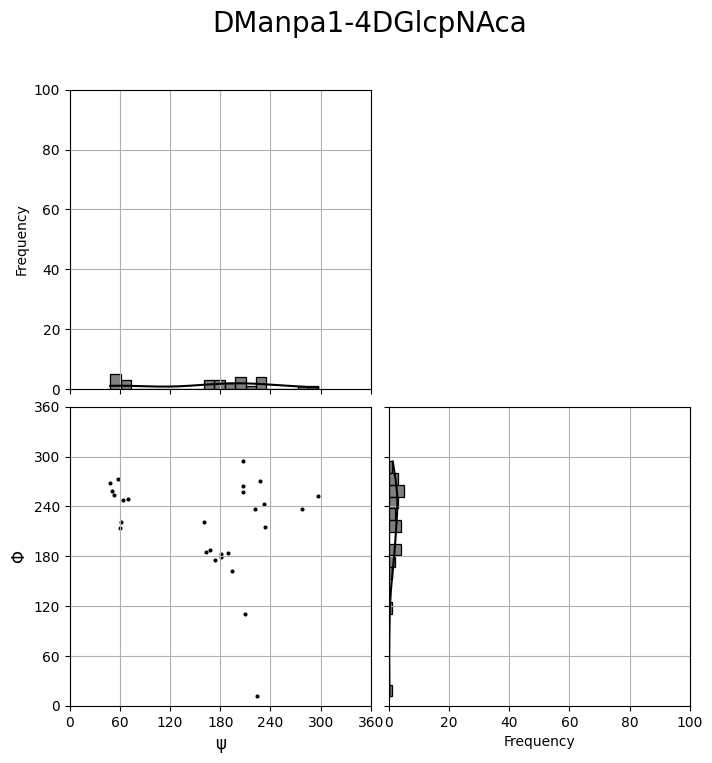

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)